In [9]:
from os import getcwd
import glob
import numpy as np
import pandas as pd
import missingno as msno

Display Settings

In [10]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [11]:
dic = pd.read_excel('data/LCDataDictionary.xlsx')

In [12]:
dic

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


Load Data

In [13]:
csv_files = glob.glob(f'{getcwd()}/data/*.csv')
df = pd.concat((pd.read_csv(f, header=1, low_memory=False) for f in csv_files))

Descriptive Statistics

In [14]:
df.shape

(2004091, 151)

In [15]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [16]:
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [17]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004058e+06,2.002895e+06,2.004033e+06,2.004062e+06,2.004062e+06,2.004032e+06,989145.000000,327999.000000,2.004033e+06,2.004033e+06,2.004062e+06,2.004033e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.004062e+06,2.003917e+06,521765.000000,2004062.0,8.614300e+04,86139.000000,2.004033e+06,1.933786e+06,1.933786e+06,1.137932e+06,1.137933e+06,1.137933e+06,1.137933e+06,1.103227e+06,1.137933e+06,976000.000000,1.137933e+06,1.137933e+06,1.137933e+06,1.137780e+06,1.933786e+06,1.137933e+06,1.137932e+06,1.137932e+06,1.954032e+06,1.933741e+06,1.932465e+06,1.931441e+06,2.003917e+06,2.004033e+06,1.874080e+06,1.933785e+06,1.933785e+06,1.933786e+06,1.954032e+06,1.933791e+06,469107.000000,1.740690e+06,666496.000000,1.933786e+06,1.933786e+06,1.933786e+06,1.945472e+06,1.933786e+06,1.933786e+06,1.933786e+06,1.933785e+06,1.933786e+06,1.945472e+06,1.856518e+06,1.933786e+06,1.933786e+06,1.933786e+06,1.933632e+06,1.932024e+06,2.002697e+06,2.003957e+06,1.933786e+06,1.954032e+06,1.954032e+06,1.933786e+06,73453.000000,73454.000000,73454.000000,73454.000000,73454.000000,73454.000000,72185.000000,73454.000000,73454.000000,73454.000000,73454.000000,25176.00000,9116.0,9116.000000,9116.0,9116.000000,7310.000000,9116.000000,9116.000000,27178.000000,27178.000000,27178.000000
mean,NaN,1.492073e+04,1.491479e+04,1.489462e+04,4.430816e+02,7.754658e+04,1.869026e+01,3.169124e-01,6.976786e+02,7.016788e+02,5.954416e-01,34.261331,71.039521,1.161852e+01,2.070595e-01,1.665030e+04,2.434933e+01,4.159730e+03,4.158621e+03,1.201638e+04,1.199638e+04,9.446742e+03,2.434375e+03,1.366390e+00,1.338945e+02,2.205063e+01,3.444227e+03,6.872280e+02,6.755634e+02,1.814197e-02,43.900191,1.0,1.208037e+05,19.265128,4.679065e-03,2.383424e+02,1.420349e+05,9.418445e-01,2.789699e+00,6.759387e-01,1.566642e+00,2.135687e+01,3.542448e+04,69.388856,1.309277e+00,2.788807e+00,5.757916e+03,5.764244e+01,3.398047e+04,9.947695e-01,1.470554e+00,2.071075e+00,4.538107e+00,1.351936e+04,1.089607e+04,5.889142e+01,8.671018e-03,1.38050

In [18]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.999716,0.998883,0.946411,0.194399,0.041233,-0.006485,0.108828,0.108827,-0.026458,-0.014513,0.002358,0.183651,-0.057728,0.316519,0.203658,0.458967,0.458968,0.681686,0.681705,0.602071,0.606083,0.074709,0.124898,0.119282,0.327954,0.092735,0.077361,-0.021073,0.002090,NaN,0.321420,0.060240,0.000313,-0.004387,0.314248,-0.020925,0.031832,0.001256,0.025677,-0.015640,0.151972,-0.089141,-0.045525,-0.033497,0.362328,0.001786,0.324229,0.002090,0.073312,0.010427,0.000579,0.229281,0.201175,0.050484,-0.002711,0.001224,0.126904,0.169750,0.053388,0.027106,0.223266,0.038196,-0.034480,0.002302,-0.026447,-0.052520,0.191939,0.150491,0.212530,0.193740,0.080928,0.162856,0.165920,0.149629,0.181092,-0.001566,0.001638,-0.023280,-0.026248,0.088068,0.021841,-0.086446,0.009983,0.337821,0.277913,0.370653,0.208430,0.371614,0.235270,0.235270,-0.072157,0.201803,0.214578,0.019870,0.055436,0.201814,-0.053500,-0.080886,0.114991,NaN,0.714702,NaN,0.042530,0.714369,0.850514,0.468037,0.809822,-0.065166,0.222907
funded_amnt,NaN,0.999716,1.000000,0.999236,0.946809,0.194355,0.041477,-0.006359,0.108323,0.108322,-0.026773,-0.014522,0.002339,0.183842,-0.057569,0.316440,0.203571,0.459459,0.459460,0.681578,0.681662,0.601992,0.605934,0.074731,0.124882,0.119337,0.327963,0.092679,0.077319,-0.021000,0.002092,NaN,0.321421,0.060244,0.000354,-0.004387,0.314249,-0.020924,0.031833,0.001257,0.025678,-0.015640,0.151973,-0.089140,-0.045525,-0.033495,0.362328,0.001784,0.324229,0.002092,0.073312,0.010429,0.000580,0.229281,0.201180,0.050479,-0.002658,0.001236,0.126904,0.169750,0.053389,0.027107,0.223266,0.038195,-0.034480,0.002303,-0.026445,-0.052521,0.191940,0.150492,0.212529,0.193739,0.080929,0.162

In [19]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10159498,NaN,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-1994,760.0,764.0,1.0,43.0,NaN,12.0,0.0,13168.0,21.6%,22.0,w,0.0,0.0,13263.954639,13263.95,12000.0,1263.95,0.0,0.0,0.0,Jan-2017,368.20,NaN,Oct-2018,814.0,810.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,267646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61100.0,NaN,NaN,NaN,4.0,26765.0,39432.0,25.0,0.0,0.0,146.0,237.0,20.0,3.0,4.0,20.0,NaN,3.0,43.0,0.0,2.0,2.0,5.0,5.0,9.0,8.0,9.0,2.0,12.0,0.0,0.0,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,10129506,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,Operations Manager,10+ years,RENT,81500.0,Verified,Dec-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/31/13 > My goal is to p...,debt_consolidation,Reducing Debt to Purchase Home,100xx,NY,16.73,0.0,Jun-1998,685.0,689.0,2.0,64.0,NaN,29.0,0.0,23473.0,54.5%,41.0,f,0.0,0.0,23926.640008,23926.64,20800.0,3126.64,0.0,0.0,0.0,May-2015,13334.93,NaN,Oct-2018,644.0,640.0,0.0,71.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,23473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN,9.0,869.0,6811.0,54.6,0.0,0.0,115.0,186.0,0.0,0.0,0.0,0.0,70.0,0.0,70.0,1.0,8.0,24.0,11.0,17.0,1.0,29.0,40.0,24.0,29.0,

In [20]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
103543,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49%,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9%,37.0,f,26449.73,26449.73,20606.13,20606.13,13550.27,7055.86,0.00,0.0,0.0,Oct-2018,859.56,Nov-2018,Oct-2018,729.0,725.0,0.0,10.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,28398.0,0.0,2.0,0.0,1.0,15.0,19765.0,46.0,0.0,0.0,5141.0,51.0,13300.0,3.0,0.0,2.0,2.0,5680.0,4070.0,66.9,0.0,0.0,154.0,258.0,33.0,15.0,3.0,41.0,9.0,1.0,9.0,6.0,2.0,3.0,2.0,15.0,9.0,3.0,23.0,3.0,5.0,0.0,0.0,7.0,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
103544,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49%,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1%,31.0,f,0.00,0.00,6755.40,6755.40,3521.91,3233.49,0.00,0.0,0.0,Oct-2017,564.56,NaN,Oct-2018,549.0,545.0,0.0,67.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,62426.0,0.0,2.0,0.0,2.0,20.0,44785.0,78.0,1.0,5.0,6172.0,73.0,25900.0,0.0,0.0,1.0,7.0,6243.0,4660.0,77.5,0.0,0.0,132.0,206.0,9.0,9.0,2.0,9.0,NaN,9.0,NaN,1.0,5.0,7.0,5.0,15.0,4.0,8.0,24.0,7.0,10.0,0.0,0.0,0.0,1.0,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,

In [21]:
df.sample(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
345311,43326073,NaN,23750.0,23750.0,23750.00000,36 months,6.68%,729.87,A,A3,Director of Operations,< 1 year,RENT,75000.00,Verified,Mar-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Debt consolidation,920xx,CA,21.84,0.0,Sep-2002,775.0,779.0,0.0,NaN,NaN,11.0,0.0,11125.0,28%,26.0,f,0.00,0.00,25276.680005,25276.68,23750.00,1526.68,0.00,0.00,0.0000,Apr-2016,16527.05,NaN,Oct-2018,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,38193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39800.0,NaN,NaN,NaN,2.0,3819.0,28675.0,28.0,0.0,0.0,150.0,150.0,59.0,12.0,0.0,59.0,NaN,0.0,NaN,0.0,2.0,2.0,4.0,6.0,15.0,5.0,11.0,2.0,11.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,85914.0,38193.0,39800.0,46114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
173946,1301001,NaN,23000.0,23000.0,22750.00000,36 months,13.99%,785.98,C,C1,Josam Company,3 years,RENT,114000.00,Verified,May-2012,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/15/12 > this loan is to...,credit_card,My credit loan,957xx,CA,15.59,1.0,Aug-1988,695.0,699.0,0.0,23.0,NaN,11.0,0.0,13790.0,67.3%,33.0,f,0.00,0.00,4715.880000,4664.65,3196.00,1515.44,0.00,4.44,0.0000,Dec-2012,785.98,NaN,Jan-2018,589.0,585.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,629.0,94.4,0.0,0.0,NaN,NaN,NaN,NaN,4.0,76.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.3,0.0,0.0,NaN,6043

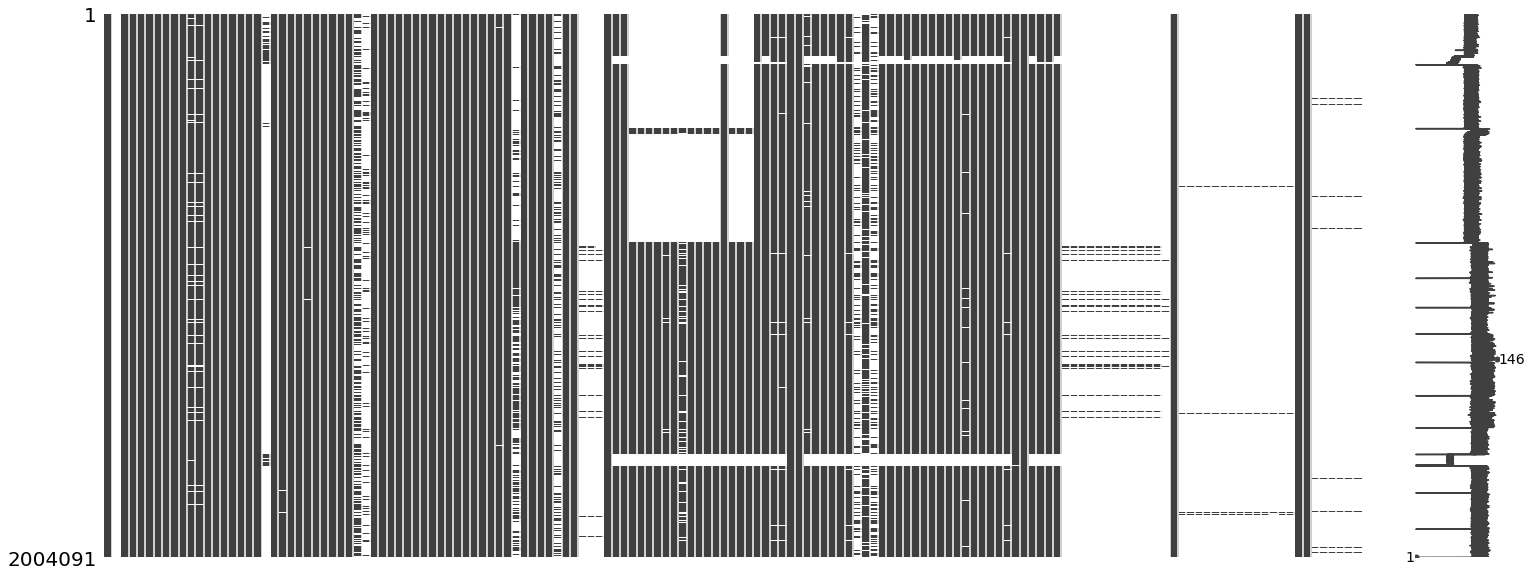

In [22]:
msno.matrix(df)

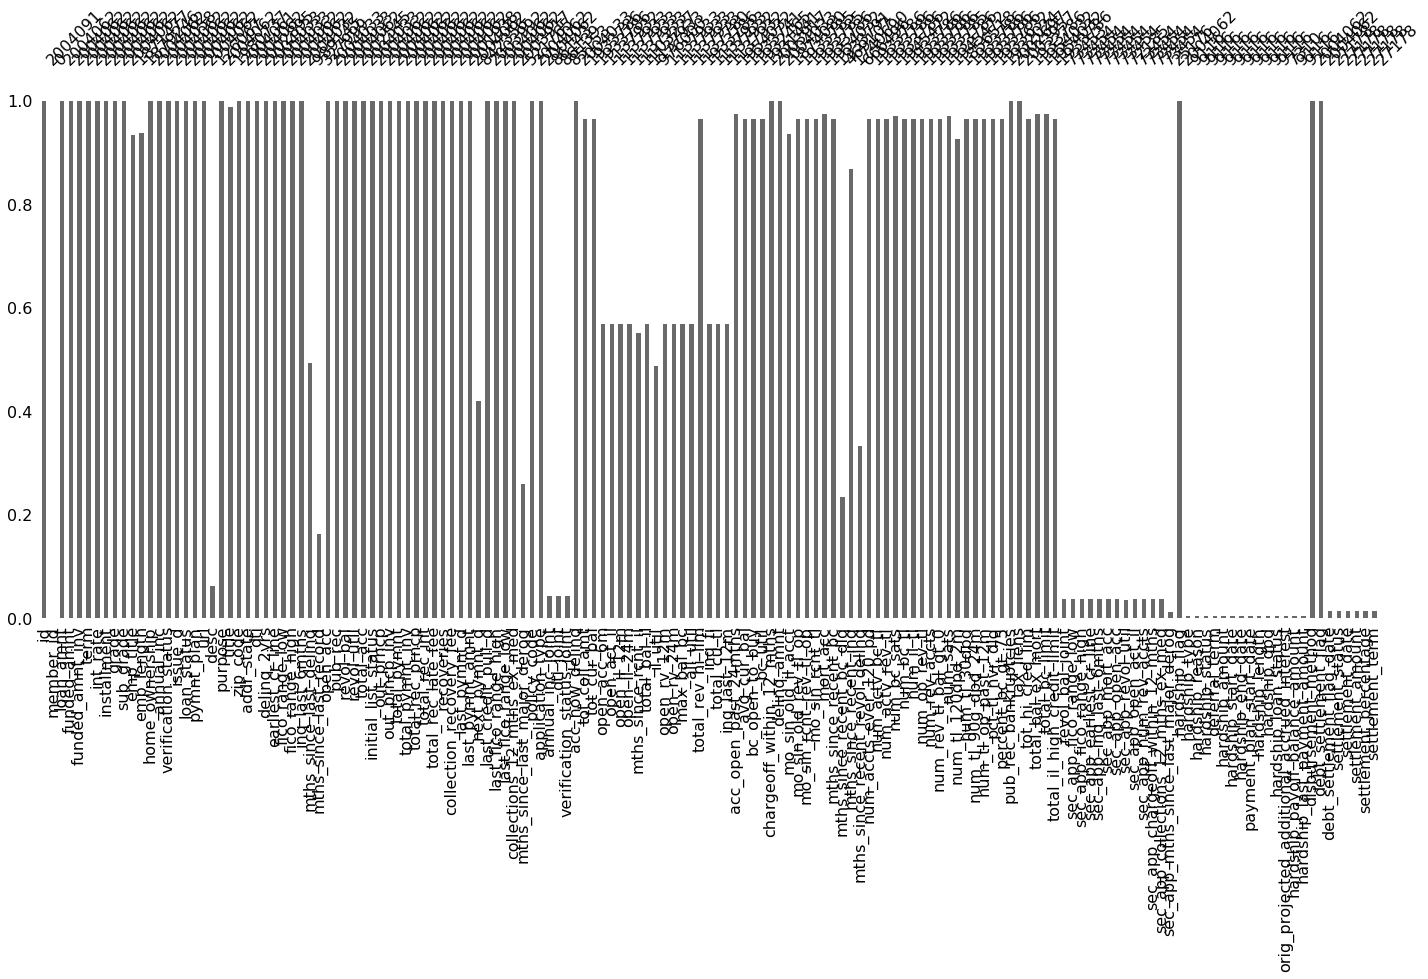

In [23]:
msno.bar(df)

In [24]:
loan_status = df.loan_status

In [25]:
loan_status.shape

(2004091,)

In [26]:
loan_status.head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [27]:
loan_status.value_counts()

Fully Paid                                             928104
Current                                                798972
Charged Off                                            233602
Late (31-120 days)                                      23027
In Grace Period                                         11950
Late (16-30 days)                                        5636
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    22
Name: loan_status, dtype: int64